**Description**

This dataset contains data about more than 75,000 used vehicles for sale in Pakistan. This dataset can be used by anyone who wants to compare vehicle prices and other features with other vehicles and addition and removal of some features from vehicles will affect the price of vehicle.

**1. Import Python Libraries**

In [1]:
#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from matplotlib import cm

#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly import tools 

from matplotlib.colors import ListedColormap


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


**2. Reading Data/Prepation Data**

In [2]:
#reading data
df = pd.read_csv('../input/used-cars-for-sale-data-pakistan/usedCarsFinal.csv')
df.head()

,name,location,model_year,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,other_features_list,url,price
0,Toyota Fortuner Legender 2022,"I- 8, Islamabad Islamabad",2022,5 km,Diesel,Automatic,Un-Registered,White,Local,2800 cc,SUV,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/toyota-for...,NaN
1,Toyota Premio X EX Package 1.8 2018,"Askari 6, Peshawar KPK",2018,"17,000 km",Petrol,Automatic,Un-Registered,Peral White,Imported,1800 cc,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/toyota-pre...,8500000.0
2,Honda City Aspire 1.3 i-VTEC 2016,"I- 8, Islamabad Islamabad",2016,"59,000 km",Petrol,Manual,Islamabad,White,Local,1300 cc,Sedan,"ABS,AM/FM Radio,Air Conditioning,Alloy Rims,CD...",https://www.pakwheels.com/used-cars/honda-city...,2375000.0
3,Suzuki Bolan VX Euro II 2018,"Dhok Sayedan Road, Rawalpindi Punjab",2018,"55,000 km",Petrol,Manual,Islamabad,White,Local,800 cc,Van,"AM/FM Radio,Immobilizer Key",https://www.pakwheels.com/used-cars/suzuki-bol...,1050000.0
4,Suzuki Swift GLX CVT 2022,Karachi Sindh,2022,2 km,Petrol,Automatic,Sindh,Grey,Local,1200 cc,Hatchback,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/suzuki-swi...,3550000.0


In [3]:
#dataset shape
df.shape

(75899, 14)

In [4]:
df.describe()

,model_year,price
count,75899.000000,7.477100e+04
mean,2011.473643,2.896745e+06
std,8.905407,4.141712e+06
min,1942.000000,1.000000e+05
25%,2007.000000,1.100000e+06
50%,2014.000000,1.950000e+06
75%,2018.000000,3.175000e+06
max,2022.000000,9.000000e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75899 entries, 0 to 75898
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 75899 non-null  object 
 1   location             75899 non-null  object 
 2   model_year           75899 non-null  int64  
 3   mileage              75899 non-null  object 
 4   engine_type          75899 non-null  object 
 5   transmission         75899 non-null  object 
 6   registered_in        75899 non-null  object 
 7   color                75899 non-null  object 
 8   assembly             75899 non-null  object 
 9   engine_capacity      75899 non-null  object 
 10  body_type            67804 non-null  object 
 11  other_features_list  69353 non-null  object 
 12  url                  75899 non-null  object 
 13  price                74771 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 8.1+ MB


In [6]:
#checking missing value
df.isnull().sum()

name                      0
location                  0
model_year                0
mileage                   0
engine_type               0
transmission              0
registered_in             0
color                     0
assembly                  0
engine_capacity           0
body_type              8095
other_features_list    6546
url                       0
price                  1128
dtype: int64

**3. Data Cleaning**

In [7]:
df=df.dropna()
df.isnull().sum()

name                   0
location               0
model_year             0
mileage                0
engine_type            0
transmission           0
registered_in          0
color                  0
assembly               0
engine_capacity        0
body_type              0
other_features_list    0
url                    0
price                  0
dtype: int64

In [8]:
#name car count by year
grp_1=df.groupby('model_year')['name'].count().reset_index()

In [9]:
fig=go.Figure(go.Bar(x=grp_1['model_year'], y=grp_1['name'
]))
fig.update_layout(title_text='used car release by year', xaxis_title="year",yaxis_title="number of used car")
fig.show()

In [10]:
df['price'].unique

<bound method Series.unique of 1        8500000.0
2        2375000.0
3        1050000.0
4        3550000.0
6        1490000.0
           ...    
75894    1350000.0
75895    4600000.0
75896    2300000.0
75897    1380000.0
75898     550000.0
Name: price, Length: 63212, dtype: float64>

**Best Used Cars based on model year > = 5 years**

In [11]:
df[df.model_year>=2015]

,name,location,model_year,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,other_features_list,url,price
1,Toyota Premio X EX Package 1.8 2018,"Askari 6, Peshawar KPK",2018,"17,000 km",Petrol,Automatic,Un-Registered,Peral White,Imported,1800 cc,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/toyota-pre...,8500000.0
2,Honda City Aspire 1.3 i-VTEC 2016,"I- 8, Islamabad Islamabad",2016,"59,000 km",Petrol,Manual,Islamabad,White,Local,1300 cc,Sedan,"ABS,AM/FM Radio,Air Conditioning,Alloy Rims,CD...",https://www.pakwheels.com/used-cars/honda-city...,2375000.0
3,Suzuki Bolan VX Euro II 2018,"Dhok Sayedan Road, Rawalpindi Punjab",2018,"55,000 km",Petrol,Manual,Islamabad,White,Local,800 cc,Van,"AM/FM Radio,Immobilizer Key",https://www.pakwheels.com/used-cars/suzuki-bol...,1050000.0
4,Suzuki Swift GLX CVT 2022,Karachi Sindh,2022,2 km,Petrol,Automatic,Sindh,Grey,Local,1200 cc,Hatchback,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/suzuki-swi...,3550000.0
7,Toyota Aqua S 2017,Islamabad Islamabad,2017,"97,000 km",Hybrid,Automatic,Un-Registered,Silver,Imported,1500 cc,Hatchback,"ABS,AM/FM Radio,Air Bags,Air Conditioning,CD P...",https://www.pakwheels.com/used-cars/toyota-aqu...,3650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75881,Toyota Vitz F 1.0 2019,"Valencia Housing Society, Lahore Punjab",2019,"91,000 km",Petrol,Automatic,Un-Registered,White,Imported,1000 cc,Hatchback,"ABS,AM/FM Radio,Air Bags,Air Conditioning,CD P...",https://www.pakwheels.com/used-cars/toyota-vit...,2780000.0
75884,Honda City 1.3 i-VTEC 2017,"Sakhi Hasan, Karachi Sindh",2017,"58,000 km",Petrol,Manual,Karachi,Silver,Local,1300 cc,Sedan,"ABS,AM/FM Radio,Air Conditioning,CD Player,DVD...",https://www.pakwheels.com/used-cars/honda-city...,2250000.0
75889,Toyota Aqua S 2018,"Shahra-e-Qaideen, Karachi Sindh",2018,"35,000 km",Hybrid,Automatic,Un-Registered,Silver,Imported,1500 cc,Hatchback,"ABS,AM/FM Radio,Air Bags,Air Conditioning,CD P...",https://www.pakwheels.com/used-cars/toyota-aqu...,4000000.0
75891,Honda City 1.3 i-VTEC 2015,"Bahria Town Rawalpindi, Rawalpindi Punjab",2015,"109,915 km",Petrol,Manual,Islamabad,White,Local,1300 cc,Sedan,"ABS,AM/FM Radio,Air Conditioning,CD Player,DVD...",https://www.pakwheels.com/used-cars/honda-city...,2350000.0


Bar Plot price vs model year

Text(0.5, 1.0, 'price vs model year')

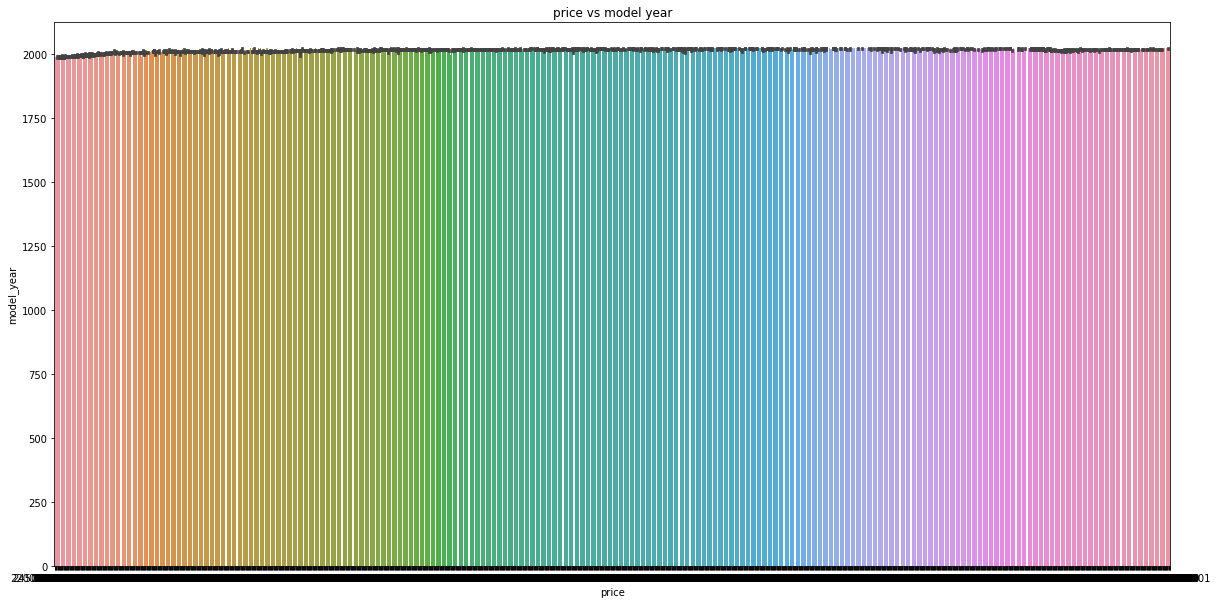

In [12]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['price'],y=df['model_year'])
plt.title("price vs model year")

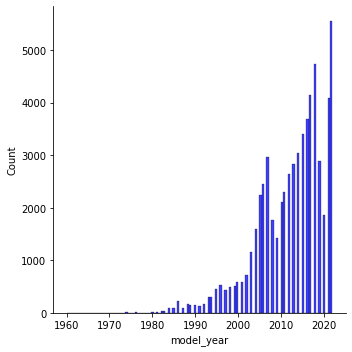

In [13]:
sns.displot(df.model_year,color='blue')

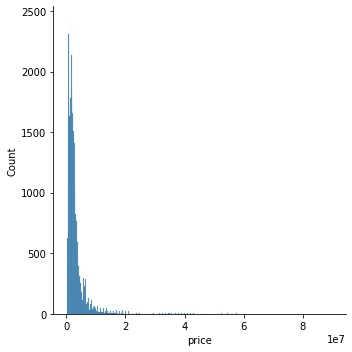

In [14]:
sns.displot(df.price)

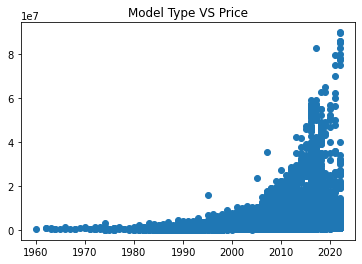

In [15]:
plt.scatter(df['model_year'],df['price'])
plt.title("Model Type VS Price")
plt.show()